In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

In [55]:
train_data = pd.read_csv('fhs_train_cleaned.csv')
train_data = train_data.drop('Unnamed: 0',axis=1)

In [60]:
test_data = pd.read_csv('fhs_test.csv')
test_data = test_data.rename(columns={'TenYearCHD': 'TEN_YEAR_CHD'})
test_data = test_data.drop('Unnamed: 0',axis=1)
test_data

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TEN_YEAR_CHD
0,0,58,1.0,1,20.0,0.0,0,0,0,NaN,126.0,77.0,30.08,78.0,NaN,0
1,0,51,3.0,0,0.0,0.0,0,0,0,264.0,135.0,83.0,26.68,60.0,74.0,0
2,0,44,2.0,1,9.0,0.0,0,1,0,NaN,147.5,96.0,30.57,78.0,NaN,1
3,0,40,2.0,1,20.0,0.0,0,0,0,271.0,138.5,88.0,27.24,80.0,NaN,1
4,1,58,2.0,1,20.0,0.0,0,0,0,207.0,110.0,80.0,23.55,78.0,78.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,0,63,2.0,0,0.0,0.0,0,1,0,184.0,196.0,101.0,28.27,86.0,82.0,1
1056,1,42,4.0,0,0.0,0.0,0,0,0,195.0,112.0,74.5,23.37,58.0,110.0,0
1057,1,63,3.0,0,0.0,0.0,0,1,0,161.0,196.0,102.0,28.43,56.0,88.0,0
1058,0,55,3.0,0,0.0,0.0,0,0,0,260.0,136.5,87.5,25.41,75.0,60.0,0


In [61]:
data.corr()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TEN_YEAR_CHD
sex,1.000000,-0.008184,0.059335,0.209998,0.310308,-0.074139,-0.056433,-0.025371,0.004769,-0.051571,-0.084723,0.031030,0.064621,-0.128771,-0.025377,0.063633
age,-0.008184,1.000000,-0.139154,-0.205061,-0.170595,0.154252,0.032935,0.343572,0.145716,0.265086,0.393690,0.206948,0.118287,0.021491,0.158242,0.235883
education,0.059335,-0.139154,1.000000,0.040483,0.029951,-0.009616,-0.050864,-0.089315,-0.028616,-0.010134,-0.113686,-0.048286,-0.090300,-0.001512,-0.012671,-0.075425
currentSmoker,0.209998,-0.205061,0.040483,1.000000,0.786340,-0.034987,-0.031994,-0.108659,-0.074039,-0.120069,-0.113899,-0.116214,-0.104552,0.060502,-0.044028,0.053774
cigsPerDay,0.310308,-0.170595,0.029951,0.786340,1.000000,-0.041831,-0.044021,-0.069470,-0.052453,-0.070802,-0.091859,-0.079421,-0.065074,0.051819,-0.036637,0.056246
BPMeds,-0.074139,0.154252,-0.009616,-0.034987,-0.041831,1.000000,0.084397,0.285782,0.052511,0.111419,0.285149,0.176543,0.145520,0.066804,0.117862,0.070681
prevalentStroke,-0.056433,0.032935,-0.050864,-0.031994,-0.044021,0.084397,1.000000,0.106582,0.095174,0.038876,0.062074,0.073557,0.118421,0.009396,0.069377,0.066650
prevalentHyp,-0.025371,0.343572,-0.089315,-0.108659,-0.069470,0.285782,0.106582,1.000000,0.071383,0.178641,0.724027,0.617213,0.279844,0.150517,0.095514,0.220643
diabetes,0.004769,0.145716,-0.028616,-0.074039,-0.052453,0.052511,0.095174,0.071383,1.000000,0.036626,0.130404,0.070201,0.097631,0.081612,0.641001,0.072371
totChol,-0.051571,0.265086,-0.010134,-0.120069,-0.070802,0.111419,0.038876,0.178641,0.036626,1.000000,0.227760,0.230341,0.143764,0.129860,0.089138,0.024272


In [62]:
print("Highest correlations come from age, prevalentHyp, sysBP, glucose, diaBP and totChol with the highest being age and sysBP")

Highest correlations come from age, prevalentHyp, sysBP, glucose, diaBP and totChol with the highest being age and sysBP


In [63]:
correlated_columns = ['age', 'prevalentHyp', 'sysBP', 'glucose', 'diaBP', 'totChol']
for column in correlated_columns:
    print(data.loc[:,[column, 'TEN_YEAR_CHD']].groupby(column).describe())

    TEN_YEAR_CHD                                              
           count      mean       std  min  25%  50%   75%  max
age                                                           
34           4.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
35          10.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
36          22.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
37          27.0  0.074074  0.266880  0.0  0.0  0.0  0.00  1.0
38          27.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
39          40.0  0.050000  0.220721  0.0  0.0  0.0  0.00  1.0
40          44.0  0.113636  0.321038  0.0  0.0  0.0  0.00  1.0
41          30.0  0.066667  0.253708  0.0  0.0  0.0  0.00  1.0
42          38.0  0.078947  0.273276  0.0  0.0  0.0  0.00  1.0
43          36.0  0.055556  0.232311  0.0  0.0  0.0  0.00  1.0
44          42.0  0.047619  0.215540  0.0  0.0  0.0  0.00  1.0
45          31.0  0.096774  0.300537  0.0  0.0  0.0  0.00  1.0
46          42.0  0.119048  0.327770  0.0  0.0  0.0  0.

In [68]:
X = data.loc[:,correlated_columns]
y = data['TEN_YEAR_CHD']

In [69]:
def maxmin(df):
    df_norm = (df-min(df))/(max(df)-min(df))    
    return df

X = X.apply(maxmin)

In [ ]:
def remove_duplicate_rows(train, test):
    df = pd.DataFrame(columns=['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TEN_YEAR_CHD'])
    for train_index, train_row in train.iterrows():
        for test_index, test_row in test.iterrows():
            print(row['name'], row['age'])
    
    df[df['column name'] == value]

In [70]:
np.random.seed(100) 
N = X.shape[0]
all = np.arange(1,N)
train = np.random.choice(N,int(.8*N) )
test = [item for item in all if item not in train]

X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]

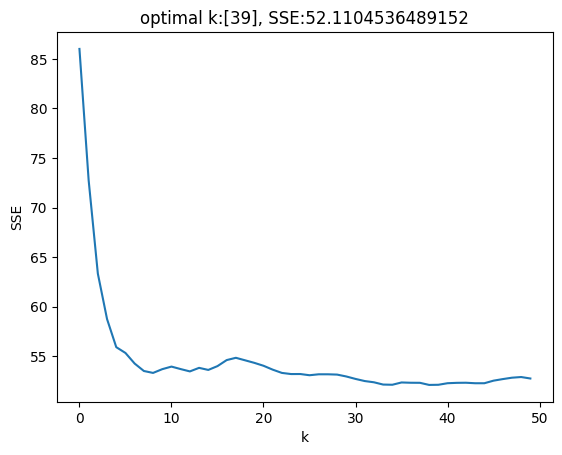

In [74]:
k_bar = 50
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar) 

for k in range(k_bar):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    predictor = knn.fit(X_train,y_train) 
    y_hat = knn.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 )

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min) 
k_star = k_grid[min_index]

plt.plot(np.arange(0,k_bar),SSE) # Plot accuracy by k
plt.xlabel("k")
plt.title(f"optimal k:{k_star}, SSE:{SSE_min}")
plt.ylabel('SSE')
plt.show()